# Import Library

In [1]:
#dependencies
import warnings
warnings.filterwarnings('ignore')

import numpy
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
from keras.models import load_model
import glob
import cv2
import os

# Loading Data

1. Data loading and exploration (10%): There are a total of 2,000 jpec pictures, in which 500 pictures are testing data and 1500 pictures are training data. Among the testing and training set, all pictures are evenly distributed into 5 categories, namely "apple", "banana", "mango", "organge" and "strawberry". All pictures have different dimensions so it may need to be resized later. 

In [2]:
fruitname ="fruits/"

fruit_categories = ["apple", "banana", "mango", "orange", "strawberry"]

In [3]:
def call_file(filetype):
    file_list = []
    label_list = []
    x = 0
    for fc in fruit_categories:
        fruit_path = fruitname + filetype + "/"+ fc + "/"
        
        for f in os.listdir(fruit_path):
            file_list += [fruit_path + f]
            label_list.append(x)
        x +=1 
    print(fc)
    return file_list, label_list

In [4]:
fl, ll = call_file('test')

strawberry


In [5]:
fl[0:5]

['fruits/test/apple/image_391.jpg',
 'fruits/test/apple/image_385.jpg',
 'fruits/test/apple/image_352.jpg',
 'fruits/test/apple/image_420.jpg',
 'fruits/test/apple/image_346.jpg']

In [6]:
ll[0:5]

[0, 0, 0, 0, 0]

2. Data preprocessing (10%): The data are first read through using the cv2 library and resized to 96 X 96 dimensions. A function is set up to first read through the "test" file and later through the "train" file. After the files are read, it's converted to numpy arrays. After that, I adopted the data normalizing and one hot-coding to generate a convenient label for machine learning training in the later stage. 

In [7]:
test_feature = []
    
for file in fl:
    img = cv2.imread(file)
    width = 96
    height = 96
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    test_feature.append(resized)

print(test_feature[7])


[[[133  61   1]
  [136  63   1]
  [141  66   0]
  ...
  [190 106   1]
  [187 104   2]
  [187 102   2]]

 [[135  62   1]
  [139  65   1]
  [144  67   0]
  ...
  [192 108   0]
  [189 106   1]
  [188 104   1]]

 [[139  65   1]
  [144  67   1]
  [147  69   1]
  ...
  [197 110   0]
  [193 109   2]
  [189 106   0]]

 ...

 [[ 15  28  19]
  [140 102  27]
  [ 81 110  92]
  ...
  [  3  22   1]
  [ 77 115  46]
  [ 89 133  61]]

 [[ 41  30  21]
  [134  95  25]
  [ 15  16  12]
  ...
  [  5  21   9]
  [ 63 112  69]
  [ 52  79  46]]

 [[129  87  29]
  [ 24  28  13]
  [ 11  16   9]
  ...
  [ 13  47  30]
  [ 10  38  32]
  [  7  16   4]]]


In [8]:
fl1, ll1 = call_file('train')

strawberry


In [9]:
fl1[:5]

['fruits/train/apple/image_193.jpg',
 'fruits/train/apple/image_187.jpg',
 'fruits/train/apple/image_178.jpg',
 'fruits/train/apple/image_150.jpg',
 'fruits/train/apple/image_15.jpg']

In [10]:
ll1[:5]

[0, 0, 0, 0, 0]

In [11]:
train_feature = []
for tf in fl1:
    img = cv2.imread(tf)
    width = 96
    height = 96
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    train_feature.append(resized)

print(train_feature[17])

[[[61 56 42]
  [57 57 41]
  [79 72 59]
  ...
  [35 88 78]
  [40 96 88]
  [38 95 83]]

 [[57 54 40]
  [54 56 40]
  [74 69 55]
  ...
  [41 87 77]
  [36 87 79]
  [36 89 78]]

 [[52 52 38]
  [48 54 37]
  [69 68 53]
  ...
  [40 74 64]
  [46 88 81]
  [44 92 81]]

 ...

 [[57 56 38]
  [59 61 40]
  [51 55 35]
  ...
  [47 44 37]
  [47 49 37]
  [46 52 35]]

 [[54 55 36]
  [57 60 39]
  [48 55 32]
  ...
  [50 48 41]
  [50 53 41]
  [44 53 35]]

 [[52 56 34]
  [54 58 36]
  [51 54 33]
  ...
  [52 53 43]
  [53 57 43]
  [47 55 37]]]


In [12]:
x_img_test = numpy.array(test_feature)
y_label_test = numpy.array(ll).reshape(500,)
x_img_train = numpy.array(train_feature)
y_label_train = numpy.array(ll1).reshape(1500,)

In [13]:
type(y_label_test)

numpy.ndarray

In [14]:
print(y_label_test[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [15]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (1500, 96, 96, 3)  labels: (1500,)
test  data: images: (500, 96, 96, 3)  labels: (500,)


In [16]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [17]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [18]:
y_label_test_OneHot.shape

(500, 5)

# Build the Model

3.	Selected model (10%): I adopt the tensor/keras model to train the data. The model has 1 convulutional layer and 1 fully connected layer. To avoid overfitting and improve the accuracy of my model, I apply a dropout rate of 25% on each layer. 

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(filters=96,kernel_size=(3,3),
                 input_shape=(96, 96,3), 
                 activation='relu', padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))


model.add(Dense(5, activation='softmax'))

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 96)        2688      
_________________________________________________________________
dropout (Dropout)            (None, 96, 96, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 221184)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 221184)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              226493440 
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0

# Train Model

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [25]:
x_img_train_normalize[:1]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.98039216, 0.98039216, 0.98039216],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.8235294 , 0.8235294 , 0.8156863 ],
         [0.64705884, 0.65882355, 0.6313726 ],
         [0.45882353, 0.47843137, 0.4392157 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.9607843 , 0.9607843 , 0.9607843 ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [26]:
y_label_train_OneHot[:5]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

# Training the model

4.	Deep Learning Modeling (30%): I train the model with 15 epochs, 20% validation split and 128 batch size. After 15 times of training, the model has reached the accuracy of nearly 0.98

In [27]:
train_history= model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=15, batch_size=128, verbose=1)   

Epoch 1/15
10/10 [==============================] - 35s 4s/step - loss: 48.5252 - accuracy: 0.2450 - val_loss: 61.6024 - val_accuracy: 0.0000e+00
Epoch 2/15
10/10 [==============================] - 32s 3s/step - loss: 5.3376 - accuracy: 0.2717 - val_loss: 8.3599 - val_accuracy: 0.0000e+00
Epoch 3/15
10/10 [==============================] - 34s 3s/step - loss: 1.4077 - accuracy: 0.3608 - val_loss: 4.0061 - val_accuracy: 0.0000e+00
Epoch 4/15
10/10 [==============================] - 37s 4s/step - loss: 1.2427 - accuracy: 0.4450 - val_loss: 10.3953 - val_accuracy: 0.0000e+00
Epoch 5/15
10/10 [==============================] - 33s 3s/step - loss: 1.0521 - accuracy: 0.5817 - val_loss: 10.8292 - val_accuracy: 0.0000e+00
Epoch 6/15
10/10 [==============================] - 35s 3s/step - loss: 0.8150 - accuracy: 0.7150 - val_loss: 15.4955 - val_accuracy: 0.0000e+00
Epoch 7/15
10/10 [==============================] - 35s 3s/step - loss: 0.5799 - accuracy: 0.8117 - val_loss: 19.2047 - val_accurac

In [48]:
import matplotlib.pyplot as plt
def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

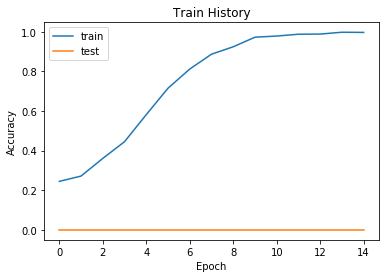

In [49]:
show_train_history('accuracy','val_accuracy')

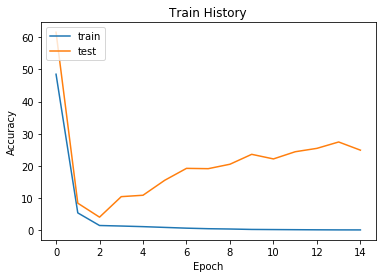

In [50]:
show_train_history('loss','val_loss')

In [51]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.4440000057220459

In [79]:
scores2 = model.evaluate(x_img_train_normalize, 
                        y_label_train_OneHot, verbose=0)
scores2[1]

0.800000011920929

In [52]:
model.save("fruit_project.h5")
print("Saved model to disk")

Saved model to disk


In [54]:
from keras.models import load_model
model = load_model('fruit_project.h5')

In [55]:
prediction = model.predict_classes(x_img_test_normalize)

In [56]:
prediction[:10]

array([0, 0, 0, 3, 0, 0, 1, 3, 0, 0])

In [71]:
label_dict={0:"apple",1:"banana",2:"mango",3:"orange",4:"strawberry"}
print(label_dict)

{0: 'apple', 1: 'banana', 2: 'mango', 3: 'orange', 4: 'strawberry'}


# Import and prediction of New images

In [59]:
fl2, ll2 = call_file('new')

strawberry


In [60]:
fl2[:5]

['fruits/new/apple/apple.jpg',
 'fruits/new/banana/banana.jpg',
 'fruits/new/mango/mango.jpg',
 'fruits/new/orange/orange.jpg',
 'fruits/new/strawberry/strawberry.jpg']

In [61]:
ll2

[0, 1, 2, 3, 4]

In [62]:
new_feature = []
    
for happy in fl2:
    img = cv2.imread(happy)
    width = 96
    height = 96
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    new_feature.append(resized)

print(new_feature[4])

[[[240 250 250]
  [240 250 250]
  [240 250 250]
  ...
  [240 250 250]
  [240 250 250]
  [240 250 250]]

 [[240 250 250]
  [240 250 250]
  [240 250 250]
  ...
  [240 250 250]
  [240 250 250]
  [240 250 250]]

 [[240 250 250]
  [240 250 250]
  [240 250 250]
  ...
  [240 250 250]
  [240 250 250]
  [240 250 250]]

 ...

 [[240 250 250]
  [240 250 250]
  [240 250 250]
  ...
  [240 250 250]
  [240 250 250]
  [240 250 250]]

 [[240 250 250]
  [240 250 250]
  [240 250 250]
  ...
  [240 250 250]
  [240 250 250]
  [240 250 250]]

 [[240 250 250]
  [240 250 250]
  [240 250 250]
  ...
  [240 250 250]
  [240 250 250]
  [240 250 250]]]


In [63]:
x_img_new = numpy.array(new_feature)
y_label_new = numpy.array(ll2).reshape(5,)

In [64]:
x_img_new_normalize = x_img_new.astype('float32') / 255.0

In [65]:
prediction1 = model.predict_classes(x_img_new_normalize)

In [98]:
label_dict={0:"apple",1:"banana",2:"mango",3:"orange",4:"strawberry"}
print(label_dict)

{0: 'apple', 1: 'banana', 2: 'mango', 3: 'orange', 4: 'strawberry'}


In [103]:
y_label_new = y_label_new.reshape(5,1)

In [104]:
y_label_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [107]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction,
                                  idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+'~'+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]); ax.set_yticks([])        
        idx+=1 
    plt.show()

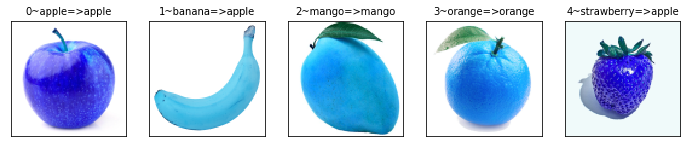

In [111]:
plot_images_labels_prediction(x_img_new,y_label_new,
                              prediction1,0,5)

Classification (10%): 5 new images are imported to test the prediction function of the machine learning model. Out of 5 predictions, the new apple, mango and orange pictures are predicted correctly while the new banana and strawberry pictures are predicted incorrectly. 

In [112]:
prediction1[0]

0

In [113]:
prediction1[1]

0

In [114]:
prediction1[2]

2

In [115]:
prediction1[3]

3

In [116]:
prediction1[4]

0

6.	Results, findings and conclusion (20%): Overall, this machine learning model is not that effective in predicting new and existing pictures. It only has a accurately level of around 60%. It is because the compression of images during data processing and the setting up in the machine learnig process may affect the accuracy of the model. Further adjustment and trials may be applied to improve the accuracy of the model.